### Pandas P6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.style.use("ggplot")
pd.set_option("display.max_columns",20)

In [3]:
df = pd.read_csv(r"F:\Pandas Project 2024\Pandas DataSets\udemy_courses.csv",  parse_dates = ['published_timestamp'])


In [4]:
# Check first 1 Rows
df.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance


In [5]:
# Check the last row
df.tail(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28 19:51:11+00:00,Web Development


In [6]:
# Check the shape
df.shape

(3678, 12)

In [7]:
rows = df.index.stop
cols = len(df.columns)
print(((rows,cols)))

(3678, 12)


In [8]:
rows = df.shape[0]
cols = df.shape[1]
print(f"rows are: ", rows)
print("columns are: ", cols)

rows are:  3678
columns are:  12


In [9]:
# Info about the data tyes and memeory 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [10]:
# Check the null value in the data
df.isna().sum()       # or we can use            df.inull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<Axes: >

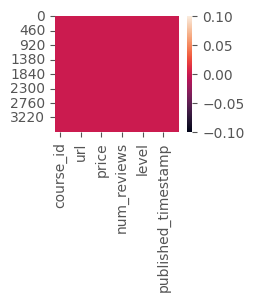

In [11]:
plt.figure(figsize=(2,1.5))
sns.heatmap(df.isnull())

In [12]:
# 6. Check For Duplicate Data and Drop Them
df[df.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development


In [13]:
# To drop the duplicated 
df.drop_duplicates(inplace = True)

In [14]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [15]:
df['subject'].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

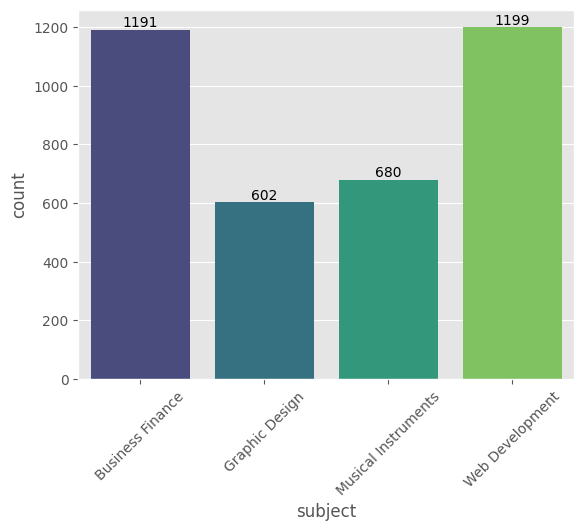

In [16]:
ax = sns.countplot(x = df['subject'],hue = 'subject', data = df,legend = False,palette = 'viridis')
for labels in ax.containers:
    ax.bar_label(labels)
plt.tick_params(axis = 'x', rotation = 45)
plt.show()

In [17]:
# Check the level of the courses
df['level'].value_counts()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

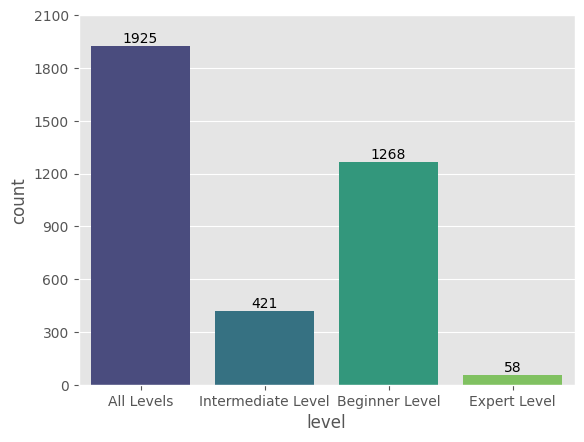

In [18]:
ax = sns.countplot(x = df['level'],hue = 'level', data = df,legend = False,palette = 'viridis')
plt.yticks(np.arange(0,2200,300))
for labels in ax.containers:
    ax.bar_label(labels)
plt.show()

In [19]:
# Display the count of Free and Paid Courses
df['is_paid'].value_counts()

is_paid
True     3362
False     310
Name: count, dtype: int64

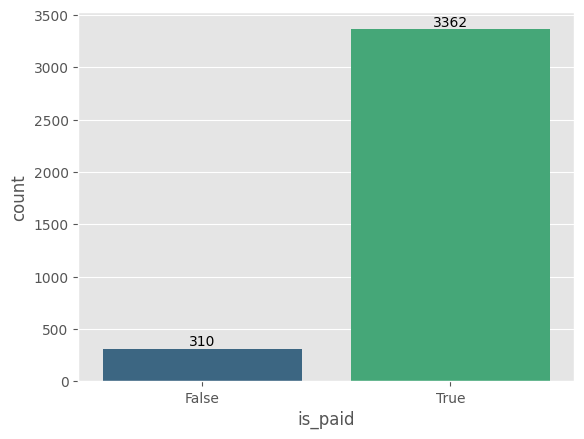

In [20]:
ax = sns.countplot(x = df['is_paid'], hue = 'is_paid',palette = 'viridis',legend = False, data = df)
for labels in ax.containers:
    ax.bar_label(labels)

In [21]:
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance


In [22]:
df['subject'].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

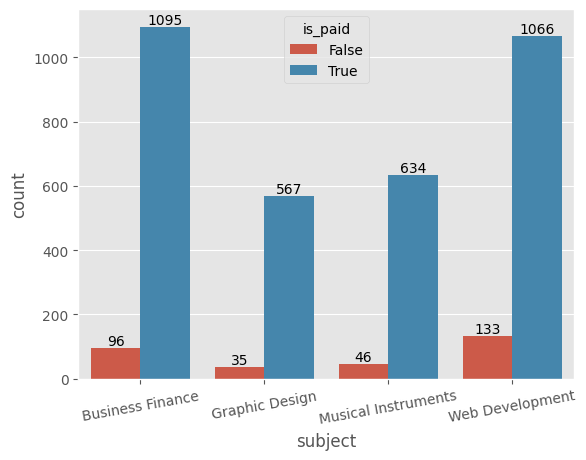

In [23]:
ax = sns.countplot(x = df['subject'],hue = 'is_paid',data = df)
for labels in ax.containers:
    plt.bar_label(labels)
plt.xticks(rotation = 10)
plt.show()

In [24]:
df['level'].value_counts()


level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

### Fig 1 Shows Actually the total number of Subscribers Per level (Summation)
### Although the bar plot operate not on summation but on the mean values obvious from Fig 2


In [ ]:
df.groupby('level')['num_subscribers'].sum()

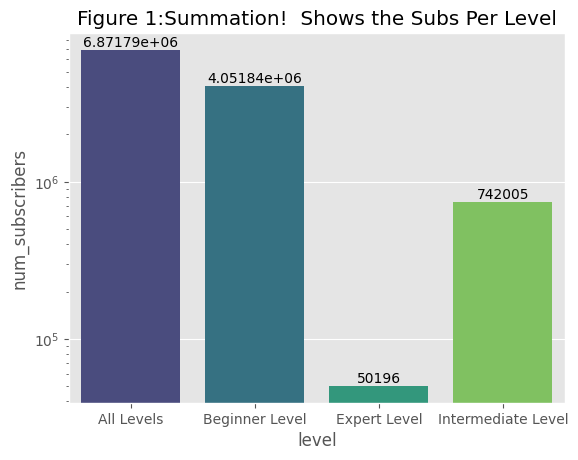

In [33]:
subscribers_per_level = df.groupby('level')['num_subscribers'].sum().reset_index()
ax= sns.barplot(x='level', y='num_subscribers', hue='level', data=subscribers_per_level, palette='viridis', legend=False)
plt.title('Figure 1:Summation!  Shows the Subs Per Level')
plt.yscale('log')
for labels in ax.containers:
    ax.bar_label(labels)
plt.show()

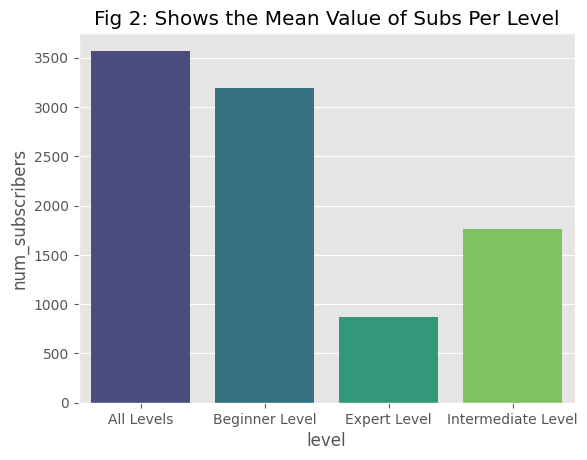

In [27]:
subscribers_per_level = df.groupby('level')['num_subscribers'].mean().reset_index()
sns.barplot(x='level', y='num_subscribers', hue='level', data=subscribers_per_level, palette='viridis', legend=False)
plt.title("Fig 2: Shows the Mean Value of Subs Per Level")
plt.show()

In [43]:
# 13: Find most popular course Title
df.columns
df[df['num_subscribers'] == df['num_subscribers'].max()]['course_title']


2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

In [65]:
# To 10 Course Title on the basis of number of subscribers
# Method 1: 
df['num_subscribers'].sort_values(ascending = False).index

Index([2827, 3032, 3230, 2783, 3232, 1896, 2589, 2619, 3289, 3247,
       ...
        885,  884,  886, 1240, 2399, 2398, 2397, 1239, 1241, 2418],
      dtype='int64', length=3672)

In [66]:
df.loc[index]['course_title']

2827                 Learn HTML5 Programming From Scratch
3032                       Coding for Entrepreneurs Basic
3230                           The Web Developer Bootcamp
2783    Build Your First Website in 1 Week with HTML5 ...
3232                The Complete Web Developer Course 2.0
1896                Free Beginner Electric Guitar Lessons
2589    Web Design for Web Developers: Build Beautiful...
2619               Learn Javascript & JQuery From Scratch
3289    Practical PHP: Master the Basics and Code Dyna...
3247            JavaScript: Understanding the Weird Parts
Name: course_title, dtype: object

In [64]:
# The same can be done using 
# Method 2: 
df.sort_values(by = 'num_subscribers',ascending = False).head(10)['course_title']

2827                 Learn HTML5 Programming From Scratch
3032                       Coding for Entrepreneurs Basic
3230                           The Web Developer Bootcamp
2783    Build Your First Website in 1 Week with HTML5 ...
3232                The Complete Web Developer Course 2.0
1896                Free Beginner Electric Guitar Lessons
2589    Web Design for Web Developers: Build Beautiful...
2619               Learn Javascript & JQuery From Scratch
3289    Practical PHP: Master the Basics and Code Dyna...
3247            JavaScript: Understanding the Weird Parts
Name: course_title, dtype: object

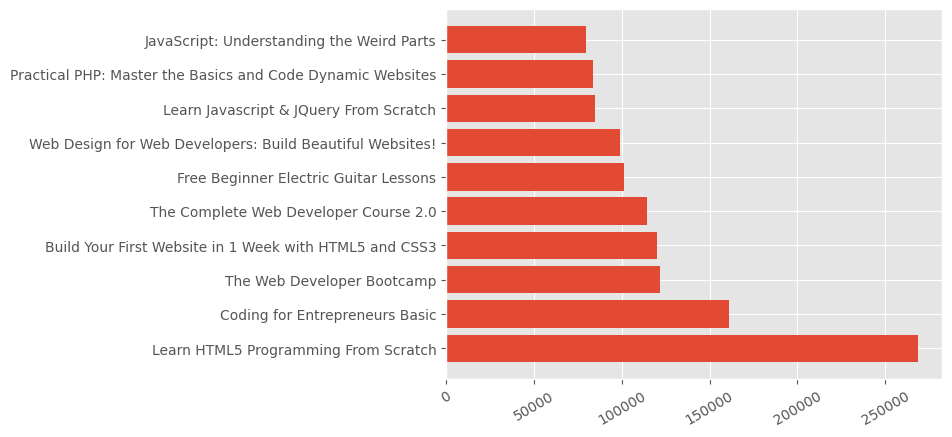

In [80]:
# To Visulaize the data

top_10 = df.sort_values(by = 'num_subscribers',ascending = False).head(10)
plt.barh(y = 'course_title',width = 'num_subscribers',data =top_10)
plt.xticks(rotation = 30)
plt.show()

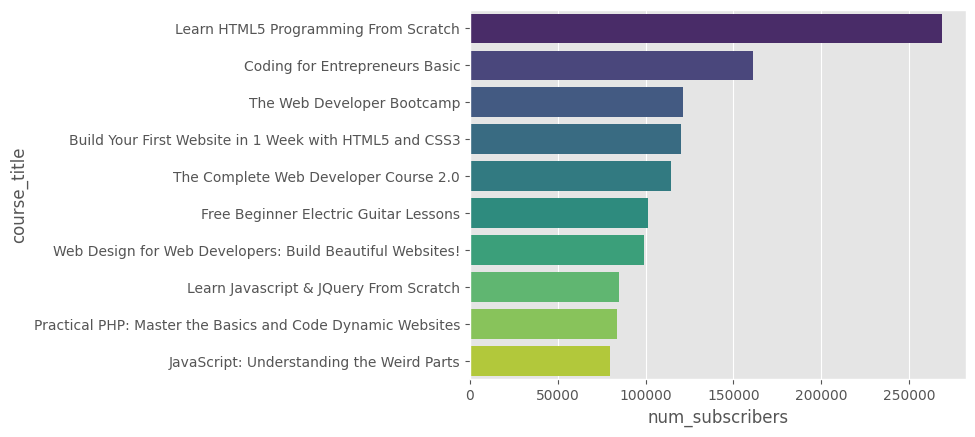

In [84]:
# WE can use Seaborn as well
sns.barplot(x = 'num_subscribers', y = 'course_title',data = top_10, hue = 'course_title', palette = 'viridis')
plt.show()

In [93]:
df[df['num_reviews'] == df['num_reviews'].max()]['course_title']

3230    The Web Developer Bootcamp
Name: course_title, dtype: object

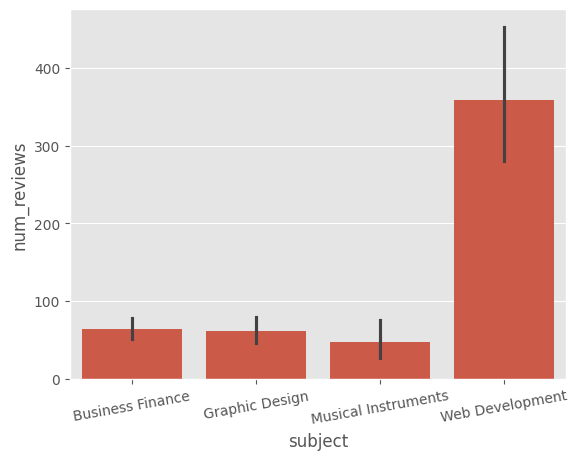

In [99]:
sns.barplot(x = 'subject', y = 'num_reviews', data = df)
plt.xticks(rotation = 10)
plt.show()

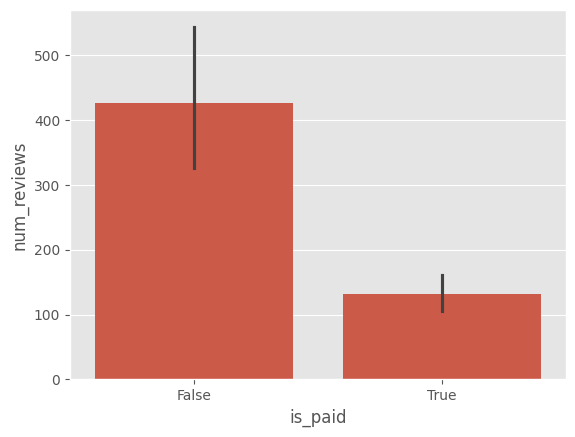

In [101]:
sns.barplot(x = 'is_paid', y = 'num_reviews', data = df)
plt.show()

<Axes: xlabel='price', ylabel='num_reviews'>

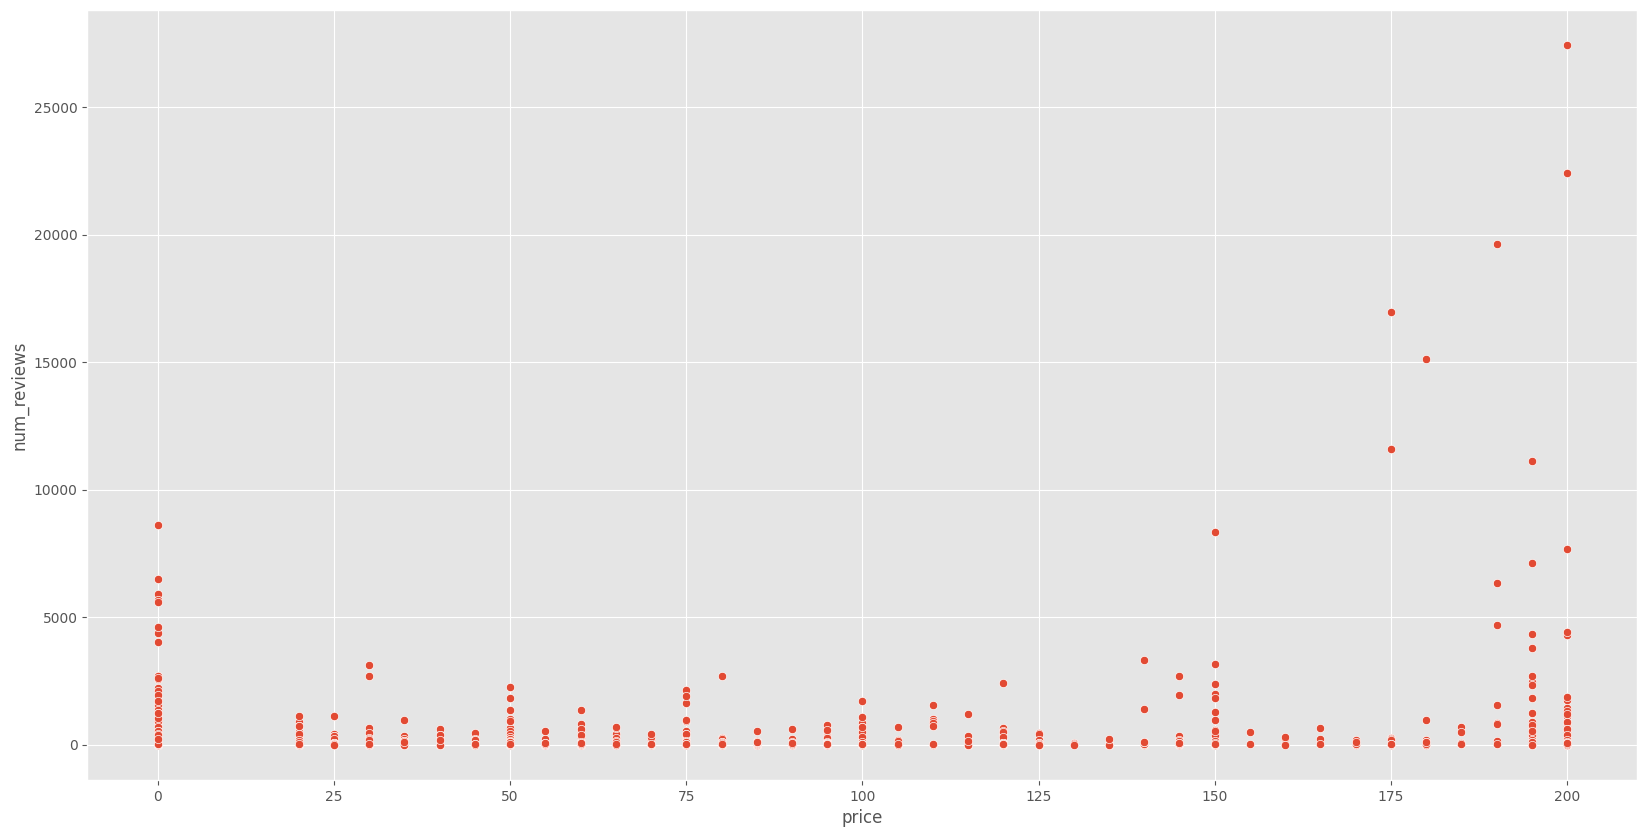

In [104]:
# or WE can Check price and Reviews
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'price', y = 'num_reviews',data = df)

In [116]:

lst = np.arange(0,201,25)
max_mean = 0
maxPrice = 0
for price in lst:
    mn = df[(df['price'] == price)]['num_reviews'].mean()
    if mn> max_mean:
        max_mean = mn
        maxPrice = price
print((max_mean, maxPrice))
    

(np.float64(2278.153846153846), np.int64(175))


In [119]:
df[df[(df['price'] == price)]['num_reviews'].max() == df['num_reviews']]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development


In [125]:
# Mean Price & Reviews of top 4 Courses
df.groupby('price')['num_reviews'].mean().sort_values(ascending = False).head(4)

price
190    3407.500000
175    2278.153846
180     990.529412
110     647.875000
Name: num_reviews, dtype: float64

In [133]:
# 17 Find the total number of courses related to Python
PythonCourse = df[df['course_title'].str.contains('python', case = False)]

In [137]:
PythonCourse.sort_values(by = 'num_subscribers',ascending = False).head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25 00:01:43+00:00,Web Development
2570,47963,"Coding for Entrepreneurs: Learn Python, Django...",https://www.udemy.com/coding-for-entrepreneurs/,True,195,23412,799,251,All Levels,45.0,2013-04-08 00:46:14+00:00,Web Development
2528,391546,Learn Python and Django: Payment Processing,https://www.udemy.com/learn-django-code-accept...,True,70,17714,198,23,All Levels,3.5,2015-02-09 15:37:56+00:00,Web Development
3200,822444,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,True,200,11832,1883,191,All Levels,31.5,2017-02-24 18:40:55+00:00,Web Development
3507,394832,Fun and creative web engineering with Python a...,https://www.udemy.com/web-engineering-with-pyt...,False,0,10917,319,25,All Levels,2.0,2015-06-09 19:51:50+00:00,Web Development
2553,938560,The Complete Ethical Hacking Course 2.0: Pytho...,https://www.udemy.com/penetration-testing-ethi...,True,195,7827,268,66,All Levels,11.0,2016-09-26 15:08:29+00:00,Web Development
3138,631128,Complete Python Web Course: Build 8 Python Web...,https://www.udemy.com/the-complete-python-web-...,True,110,7489,941,173,All Levels,16.0,2015-11-08 20:57:35+00:00,Web Development
3197,76052,Try Django 1.9 | Build a Blog and Learn Python...,https://www.udemy.com/try-django/,True,50,7407,172,147,All Levels,20.0,2014-03-04 07:12:21+00:00,Web Development
2681,477702,Python for Beginners: Python Programming Langu...,https://www.udemy.com/python-course/,True,150,6153,125,84,Beginner Level,5.0,2015-06-14 18:18:57+00:00,Web Development
3203,970600,REST APIs with Flask and Python,https://www.udemy.com/rest-api-flask-and-python/,True,110,5151,737,115,Intermediate Level,12.5,2016-11-06 19:00:38+00:00,Web Development


In [145]:
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance


In [152]:
df['year'] = df['published_timestamp'].dt.year

In [154]:
df.groupby('year')['course_title'].count()

year
2011       5
2012      45
2013     201
2014     490
2015    1014
2016    1204
2017     713
Name: course_title, dtype: int64

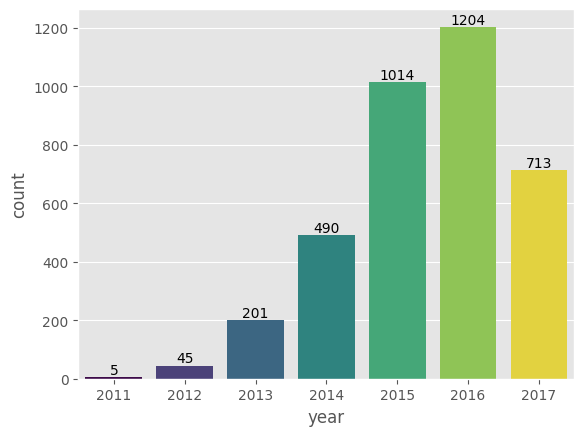

In [157]:
ax = sns.countplot(x = 'year',data = df, hue ='year', palette = 'viridis', legend = False)
for labels in ax.containers:
    ax.bar_label(labels)

In [159]:
# 20 Show Category Wise count of pOsted Subjects
df.groupby('year')['subject'].value_counts()

year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: count, dtype: int64